In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd


In [ ]:
!pip install scikeras scikit-learn

In [ ]:
!pip install rasterio matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 89.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
img_Sen_path = '/content/drive/MyDrive/GIS_train/sen2_utm.tif'

ds = gdal.Open(img_Sen_path, gdal.GA_ReadOnly)

data = ds.ReadAsArray()

bands, rows, cols = data.shape
rsl = []
for i in range(rows):
    for j in range(cols):
        if data[0, i, j] > -9999:
            tmp = np.append([i, j], data[:, i, j])
            rsl.append([i, j])

KeyboardInterrupt: 

In [ ]:
df_sen = pd.DataFrame(rsl, columns=['x', 'y'])
del rsl
import gc
gc.collect()

In [ ]:
df_sen

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/GIS_train/map.csv")

In [ ]:
df

,x,y
0,39,7748
1,39,7749
2,39,7750
3,39,7751
4,40,7746
...,...,...
18230589,4287,1747
18230590,4287,1748
18230591,4287,1749
18230592,4287,1750


In [ ]:
import pandas as pd
df_merged = pd.merge(df_sen, df, on=['x', 'y'], how='inner')
df_unique = df_merged.drop_duplicates(subset=['x', 'y'])
df_unique

NameError: name 'df_sen' is not defined

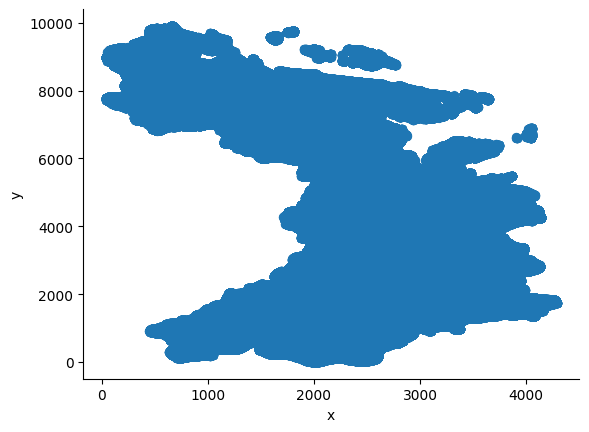

In [ ]:
from matplotlib import pyplot as plt
df_unique.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
img_Sen_path = '/content/drive/MyDrive/GIS_train/sen2_utm.tif'
img_Landsat_path = '/content/drive/MyDrive/GIS_train/imageutm.tif'
data_path = '/content/drive/MyDrive/GIS_train/data_10k.csv'

In [ ]:
# df_data = pd.read_csv(data_path)

# pixel_coords = []
# coords = list(zip(df_data['x'], df_data['y']))

# # Lặp qua từng tọa độ trong danh sách
# for x_coord, y_coord in coords:
#   # Tính toán vị trí điểm ảnh
#   x_pixel = round((x_coord - geotransform[0]) / geotransform[1])
#   y_pixel = round((y_coord - geotransform[3]) / geotransform[5])
#   # Kiểm tra xem điểm ảnh có nằm trong giới hạn của ảnh hay không
#   if 0 <= x_pixel < ds.RasterXSize and 0 <= y_pixel < ds.RasterYSize:
#         pixel_coords.append((x_pixel, y_pixel))
#   else:
#         pixel_coords.append((-9999, -9999))

# pixel_coords_df = pd.DataFrame(pixel_coords, columns=['y', 'x'])
# df_data[['x', 'y']] = pixel_coords_df[['x', 'y']]


In [ ]:
# df_data.to_csv('data.csv', index=False)

In [ ]:
df_data = pd.read_csv("/content/drive/MyDrive/GIS_train/data_pixel.csv")

In [ ]:
df_data

,x,y,label
0,3018,1468,1
1,2350,3776,1
2,2173,3123,1
3,2764,6469,1
4,1433,1376,1
...,...,...,...
9995,2370,2098,10
9996,4025,4885,10
9997,2468,645,10
9998,2654,2197,10


In [ ]:
print("Missing values in df:\n", df.isnull().sum())
print("\nMissing values in df_data:\n", df_data.isnull().sum())

Missing values in df:
 x    0
y    0
dtype: int64

Missing values in df_data:
 x        0
y        0
label    0
dtype: int64


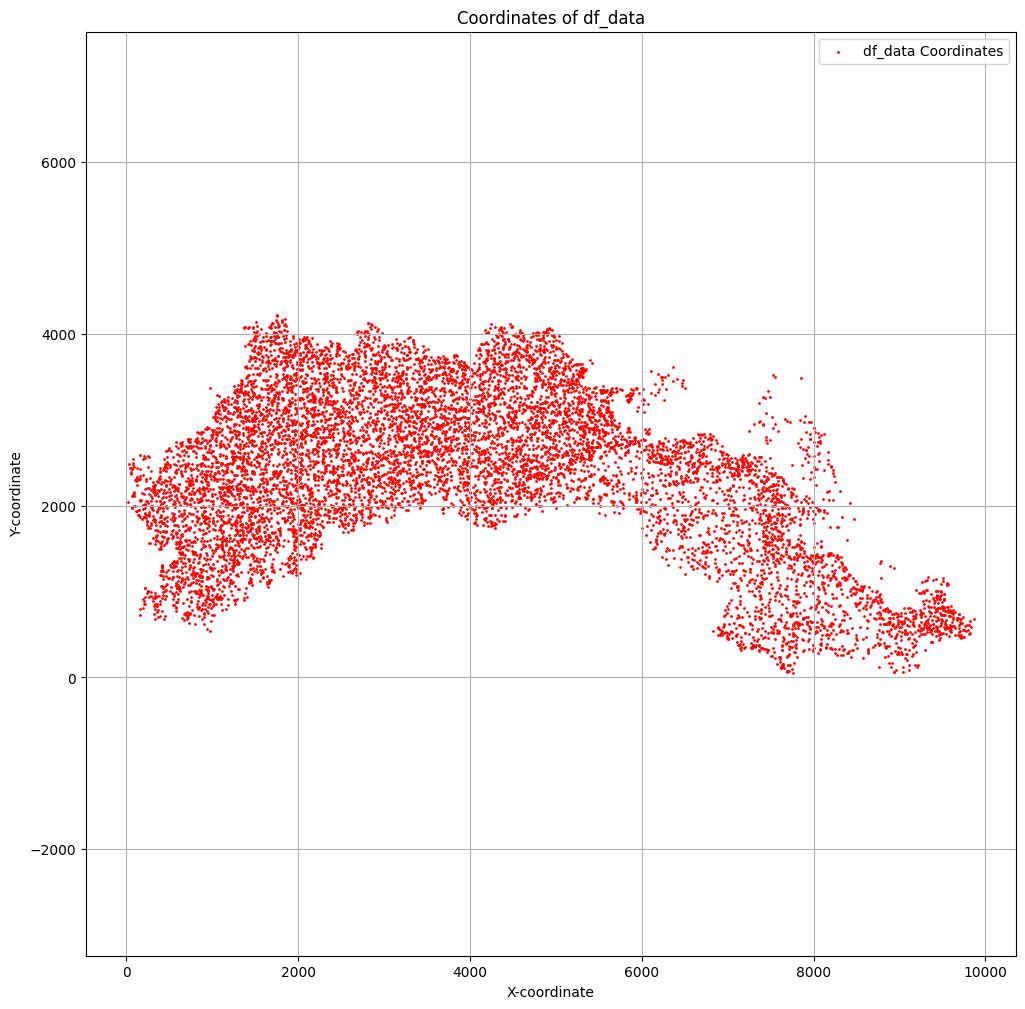

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.scatter(df_data['y'], df_data['x'], s=1, c='red', label='df_data Coordinates')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Coordinates of df_data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
df_data['label'] = df_data['label'].replace(10, 0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# split into train (80%) and the rest (20%)
df_train, df_rest = train_test_split(
    df_data,
    test_size=0.2,  # 20% for validation and test combined
    stratify=df_data['label'],
    random_state=42
)

# split the rest into validation (10%) and test (10%)
df_val, df_test = train_test_split(
    df_rest,
    test_size=0.5,  # Split the remaining 20% equally
    stratify=df_rest['label'],
    random_state=42
)

In [ ]:
df_train

,x,y,label
6371,2486,448,4
1052,2969,4839,2
3623,1416,2109,3
2453,3680,2935,2
3320,1981,2530,2
...,...,...,...
8394,880,9490,9
6680,2742,6480,5
5633,2371,2100,3
8743,2806,2161,9


In [ ]:
ds = gdal.Open(img_Landsat_path)

data = ds.ReadAsArray()
geotransform = ds.GetGeoTransform()

bands, rows, cols = data.shape

In [ ]:
def get_neighbor_values(row, col):
    # Create an empty 3x3x7 array filled with zeros
    neighbor_values = np.full((5, 5, 7), np.nan)
    row = int(row)
    col = int(col)
    for i in range(row - 2, row + 3):
        for j in range(col - 2, col + 3):
            # Check if the current neighbor is within the image bounds and not the center pixel
            if 0 <= i < ds.RasterXSize and 0 <= j < ds.RasterYSize:
                pixel_values = []
                for band_num in range(1, 8):
                    band = ds.GetRasterBand(band_num)
                    value = band.ReadAsArray(i, j, 1, 1)[0, 0]
                    pixel_values.append(value)
                # Calculate the index within the 3x3x7 array
                row_index = i - (row - 1)
                col_index = j - (col - 1)
                neighbor_values[row_index, col_index] = pixel_values
    return neighbor_values

In [ ]:
def get_neighbor_values_for_subset(df_subset):
    neighbor_values_list = []
    for index, row in df_subset.iterrows():
        neighbor_values = get_neighbor_values(row['y'], row['x'])
        neighbor_values_list.append(neighbor_values)

    df_subset['neighbor_values'] = neighbor_values_list

    return np.stack(neighbor_values_list)

In [ ]:
train_data_landsat = get_neighbor_values_for_subset(df_train)
val_data_landsat = get_neighbor_values_for_subset(df_val)
test_data_landsat = get_neighbor_values_for_subset(df_test)

In [ ]:
train_data_landsat

array([[[[0.0387    , 0.0439    , 0.0722    , ..., 0.1137    ,
          0.2202    , 0.25735   ],
         [0.0387    , 0.0413    , 0.06925   , ..., 0.1119    ,
          0.2237    , 0.27079999],
         [0.04735   , 0.0481    , 0.0727    , ..., 0.12425   ,
          0.22935   , 0.26194999],
         [0.04735   , 0.0756    , 0.1031    , ..., 0.14534999,
          0.23      , 0.25885001],
         [0.03065   , 0.0345    , 0.06145   , ..., 0.1021    ,
          0.23559999, 0.27974999]],

        [[0.0387    , 0.03605   , 0.0563    , ..., 0.10895   ,
          0.22205   , 0.26815   ],
         [0.0387    , 0.0503    , 0.0779    , ..., 0.1208    ,
          0.21265   , 0.24924999],
         [0.04735   , 0.0456    , 0.0643    , ..., 0.0982    ,
          0.20325001, 0.23954999],
         [0.04735   , 0.0694    , 0.09065   , ..., 0.1151    ,
          0.18565001, 0.2189    ],
         [0.03065   , 0.0355    , 0.06065   , ..., 0.10135   ,
          0.22945   , 0.27329999]],

        [[0.0387

In [ ]:
ds = gdal.Open(img_Sen_path)

data = ds.ReadAsArray()
geotransform = ds.GetGeoTransform()

bands, rows, cols = data.shape

In [ ]:
def get_neighbor_values(row, col):
    # Create an empty 3x3x7 array filled with zeros
    neighbor_values = np.full((5, 5, 13), np.nan)
    row = int(row)
    col = int(col)
    for i in range(row - 2, row + 3):
        for j in range(col - 2, col + 3):
            # Check if the current neighbor is within the image bounds and not the center pixel
            if 0 <= i < ds.RasterXSize and 0 <= j < ds.RasterYSize:
                pixel_values = []
                for band_num in range(1, 14):
                    band = ds.GetRasterBand(band_num)
                    value = band.ReadAsArray(i, j, 1, 1)[0, 0]
                    pixel_values.append(value)
                # Calculate the index within the 3x3x7 array
                row_index = i - (row - 1)
                col_index = j - (col - 1)
                neighbor_values[row_index, col_index] = pixel_values
    return neighbor_values

In [ ]:
train_data_sen = get_neighbor_values_for_subset(df_train)
val_data_sen = get_neighbor_values_for_subset(df_val)
test_data_sen = get_neighbor_values_for_subset(df_test)

In [ ]:
train_data_sen

array([[[[0.0387    , 0.0439    , 0.0722    , ..., 0.21255   ,
          0.13765   , 0.0211    ],
         [0.0387    , 0.0413    , 0.06925   , ..., 0.208     ,
          0.131     , 0.0211    ],
         [0.04735   , 0.0481    , 0.0727    , ..., 0.2254    ,
          0.141     , 0.02115   ],
         [0.04735   , 0.0756    , 0.1031    , ..., 0.23485   ,
          0.18205   , 0.0211    ],
         [0.03065   , 0.0345    , 0.06145   , ..., 0.19750001,
          0.11265   , 0.0211    ]],

        [[0.0387    , 0.03605   , 0.0563    , ..., 0.21885   ,
          0.13665   , 0.02115   ],
         [0.0387    , 0.0503    , 0.0779    , ..., 0.2182    ,
          0.14444999, 0.02115   ],
         [0.04735   , 0.0456    , 0.0643    , ..., 0.19859999,
          0.13420001, 0.02115   ],
         [0.04735   , 0.0694    , 0.09065   , ..., 0.22205   ,
          0.17185   , 0.02115   ],
         [0.03065   , 0.0355    , 0.06065   , ..., 0.18595   ,
          0.1019    , 0.02115   ]],

        [[0.0387

In [ ]:
from math import nan
import numpy as np

def replace_invalid_values(data):

    # Tìm các vị trí của giá trị không hợp lệ
    indices = np.where(np.logical_or(data <= 0, np.isnan(data)))

    # Tính toán giá trị trung vị của các giá trị hợp lệ
    median_value = np.nanmedian(data)

    # Thay thế các giá trị không hợp lệ bằng giá trị trung vị
    data[indices] = median_value

    return data

In [ ]:
train_data_landsat = replace_invalid_values(train_data_landsat)
val_data_landsat = replace_invalid_values(val_data_landsat)
test_data_landsat = replace_invalid_values(test_data_landsat)

In [ ]:
train_data_sen = replace_invalid_values(train_data_sen)
val_data_sen = replace_invalid_values(val_data_sen)
test_data_sen = replace_invalid_values(test_data_sen)

In [ ]:
train_data_landsat = (train_data_landsat - np.min(train_data_landsat)) / (np.max(train_data_landsat) - np.min(train_data_landsat))
val_data_landsat = (val_data_landsat - np.min(val_data_landsat)) / (np.max(val_data_landsat) - np.min(val_data_landsat))
test_data_landsat = (test_data_landsat - np.min(test_data_landsat)) / (np.max(test_data_landsat) - np.min(test_data_landsat))

In [ ]:
train_data_sen = (train_data_sen - np.min(train_data_sen)) / (np.max(train_data_sen) - np.min(train_data_sen))
val_data_sen = (val_data_sen - np.min(val_data_sen)) / (np.max(val_data_sen) - np.min(val_data_sen))
test_data_sen = (test_data_sen - np.min(test_data_sen)) / (np.max(test_data_sen) - np.min(test_data_sen))

In [ ]:
import numpy as np
train_data = np.concatenate((train_data_landsat, train_data_sen), axis=3)
val_data = np.concatenate((val_data_landsat, val_data_sen), axis=3)
test_data = np.concatenate((test_data_landsat, test_data_sen), axis=3)

In [ ]:
mean = np.mean(train_data_sen)
std = np.std(train_data_sen)

print("Mean:", mean)
print("Std:", std)

if std == 0 or np.isnan(std) or np.isinf(std):
    print("Cảnh báo: Std không hợp lệ!")


Mean: 0.16788117946010447
Std: 0.1168666598587072


In [ ]:
import numpy as np

value_to_find = -1.7976931348623157e+308
indices = np.where(train_data_sen == value_to_find)

if indices[0].size > 0:
    print(f"Value {value_to_find} found at indices: {indices}")
else:
    print(f"Value {value_to_find} not found in train_data.")


Value -1.7976931348623157e+308 not found in train_data.


In [ ]:
print("Có NaN trong dữ liệu không?", np.isnan(train_data_sen).any())
print("Có Inf trong dữ liệu không?", np.isinf(train_data_sen).any())
print("Có giá trị quá lớn không?", np.max(train_data_sen), np.min(train_data_sen))
print("Tất cả dữ liệu có bằng 0 không?", np.all(train_data_sen == 0))

Có NaN trong dữ liệu không? False
Có Inf trong dữ liệu không? False
Có giá trị quá lớn không? 1.0 0.0
Tất cả dữ liệu có bằng 0 không? False


In [ ]:
train_data_landsat.shape

(8000, 5, 5, 7)

In [ ]:
train_data

array([[[[0.03354529, 0.03996886, 0.08126784, ..., 0.26587823,
          0.17214192, 0.02628121],
         [0.03189073, 0.03807098, 0.07985661, ..., 0.26018398,
          0.16381953, 0.02628121],
         [0.03215027, 0.03881716, 0.08449585, ..., 0.28195983,
          0.1763344 , 0.02634378],
         [0.03521607, 0.04846873, 0.09255775, ..., 0.29378638,
          0.22770791, 0.02628121],
         [0.02846808, 0.0331722 , 0.06936154, ..., 0.24704337,
          0.14085477, 0.02628121]],

        [[0.02446146, 0.02884116, 0.06958863, ..., 0.2737626 ,
          0.17089043, 0.02634378],
         [0.02978199, 0.03610823, 0.0746334 , ..., 0.27294913,
          0.18065202, 0.02634378],
         [0.02892227, 0.03513496, 0.07567155, ..., 0.24841999,
          0.1678243 , 0.02634378],
         [0.03356151, 0.04613288, 0.08777251, ..., 0.27776735,
          0.21494274, 0.02634378],
         [0.02245004, 0.0276408 , 0.0659551 , ..., 0.2325887 ,
          0.12740129, 0.02634378]],

        [[0.0265

In [ ]:
def get_labels_for_subset(df_subset):

    labels = df_subset['label'].to_numpy().astype(int)

    return labels

In [ ]:
train_labels = get_labels_for_subset(df_train)
val_labels = get_labels_for_subset(df_val)
test_labels = get_labels_for_subset(df_test)

In [ ]:
train_labels

array([4, 2, 3, ..., 3, 9, 2])

In [ ]:
# 1. Nhiễu Gaussian
def add_gaussian_noise(data, mean=0, std=0.002):
    noise = np.random.normal(mean, std, data.shape)
    return np.clip(data + noise, 0, 1)

# 2. Điều chỉnh độ sáng
def adjust_brightness(data, factor_range=(0.9, 1.1)):
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = (data - min_val) / (max_val - min_val)

    # Adjust brightness
    factor = np.random.uniform(*factor_range)
    adjusted_data = np.clip(data_normalized * factor, 0, 1)

    # Rescale back to the original range
    adjusted_data = adjusted_data * (max_val - min_val) + min_val

    return adjusted_data

# 3. Dịch phổ
def spectral_shift(data, shift_range=(-0.01, 0.01)):
    shift = np.random.uniform(*shift_range, size=(data.shape[-1]))
    # Ensure shift is broadcasted correctly
    shifted_data = data + shift[None, None, :]
    return np.clip(shifted_data, 0, 1)

# 4. Xoay ảnh (90, 180, 270 độ)
def rotate_3x3(data):
    k = np.random.choice([1, 2, 3])  # Xoay 90, 180, 270 độ
    rotated_data = np.rot90(data, k=k, axes=(1, 2))

    # Check dimensions and pad only if necessary
    pad_width = ((0, 0), (0, max(0, 3 - rotated_data.shape[1])), (0, max(0, 7 - rotated_data.shape[2])))
    rotated_data = np.pad(rotated_data, pad_width, 'constant')

    # Crop to desired size
    rotated_data = rotated_data[:, :3, :7]

    return rotated_data

# 5. Lật ảnh (ngang, dọc)
def flip_3x3(data):
    if np.random.rand() > 0.5:
        data = np.flip(data, axis=1)  # Lật theo hàng
    if np.random.rand() > 0.5:
        data = np.flip(data, axis=2)  # Lật theo cột
    return data

# Tạo dữ liệu tăng cường (x10 lần)
def augment_data(original_data, labels):
    augmented_data = []
    augmented_labels = []

    for i in range(len(original_data)):
        sample = original_data[i]
        label = labels[i]

        # Giữ lại mẫu gốc
        augmented_data.append(sample)
        augmented_labels.append(label)

        # Tạo 9 phiên bản tăng cường
        for _ in range(9):
            augmented_sample = sample.copy()

            # Áp dụng ngẫu nhiên các phép biến đổi
            if np.random.rand() > 0.5:
                augmented_sample = add_gaussian_noise(augmented_sample)
            if np.random.rand() > 0.5:
                augmented_sample = adjust_brightness(augmented_sample)
            if np.random.rand() > 0.5:
                augmented_sample = spectral_shift(augmented_sample)
            if np.random.rand() > 0.5:
                augmented_sample = rotate_3x3(augmented_sample)
            if np.random.rand() > 0.5:
                augmented_sample = flip_3x3(augmented_sample)

            augmented_data.append(augmented_sample)
            augmented_labels.append(label)

    return np.array(augmented_data), np.array(augmented_labels)

In [ ]:
augmented_train_data, augmented_train_labels = augment_data(train_data, train_labels)

In [ ]:
print("Kích thước dữ liệu gốc:", train_data.shape)
print("Kích thước dữ liệu sau tăng cường:", augmented_train_data.shape)
print("Số lượng nhãn sau tăng cường:", augmented_train_labels.shape)

Kích thước dữ liệu gốc: (8000, 3, 3, 7)
Kích thước dữ liệu sau tăng cường: (80000, 3, 3, 7)
Số lượng nhãn sau tăng cường: (80000,)


In [ ]:
augmented_train_data

array([[[[0.03587164, 0.04274068, 0.08690373, ..., 0.43767563,
          0.28794449, 0.14678231],
         [0.03410234, 0.04071119, 0.08539462, ..., 0.5099046 ,
          0.28751084, 0.14275802],
         [0.03437988, 0.04150911, 0.09035559, ..., 0.49830009,
          0.28339983, 0.14468343]],

        [[0.02615785, 0.03084128, 0.07441457, ..., 0.46940156,
          0.25892454, 0.11439722],
         [0.03184735, 0.03861232, 0.07980919, ..., 0.44725065,
          0.27375542, 0.12827407],
         [0.03092801, 0.03757155, 0.08091934, ..., 0.44657415,
          0.2487771 , 0.13583695]],

        [[0.02843018, 0.03406765, 0.0775889 , ..., 0.54343452,
          0.27635733, 0.11807459],
         [0.02962706, 0.03585429, 0.07885516, ..., 0.5312229 ,
          0.28149176, 0.13486557],
         [0.02728534, 0.03562879, 0.08105811, ..., 0.53769297,
          0.25401561, 0.10893322]]],


       [[[0.13589368, 0.13339201, 0.13579366, ..., 0.        ,
          0.        , 0.        ],
         [0.

In [ ]:
import numpy as np
value_to_find = 0
indices = np.where(train_data == value_to_find)

if indices[0].size > 0:
    print(f"Value {value_to_find} found at indices: {indices}")
else:
    print(f"Value {value_to_find} not found in augmented_train_data.")


Value 0 found at indices: (array([ 235,  235,  235,  235,  235,  235,  235,  235,  235,  235,  235,
        235,  318,  799,  799,  799,  799, 1248, 1248, 1282, 1282, 1282,
       1282, 1282, 1282, 1282, 1282, 1282, 1282, 1282, 1282, 1282, 1282,
       1282, 1377, 1377, 1377, 1377, 1377, 1377, 1377, 1377, 1720, 1720,
       1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720,
       1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720, 1720,
       1720, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963,
       1973, 1973, 1973, 1973, 1973, 2275, 2359, 2359, 2541, 2541, 2541,
       2541, 2541, 2541, 2541, 2541, 2622, 2622, 2695, 2938, 2938, 2938,
       2938, 2938, 2938, 2938, 2938, 2938, 2938, 2938, 2938, 2938, 2938,
       3467, 3467, 3467, 3467, 3467, 3467, 3467, 3467, 3467, 3467, 3467,
       3467, 3467, 3467, 3467, 3467, 3467, 3467, 3467, 3519, 3519, 3519,
       3519, 3519, 3519, 3519, 3519, 3519, 3519, 3519, 3519, 3637, 3637,
       3637, 3637, 3637,

In [ ]:
from collections import Counter

label_counts = Counter(train_labels)
label_counts

Counter({np.int64(4): 400,
         np.int64(2): 2000,
         np.int64(3): 2000,
         np.int64(9): 600,
         np.int64(1): 800,
         np.int64(6): 100,
         np.int64(5): 200,
         np.int64(0): 900,
         np.int64(7): 800,
         np.int64(8): 200})

In [ ]:
import pandas as pd

label_counts_train = df_train['label'].value_counts()
label_counts_val = df_val['label'].value_counts()
label_counts_test = df_test['label'].value_counts()

print("Train Label Counts:", label_counts_train)
print("\nValidation Label Counts:", label_counts_val)
print("\nTest Label Counts:",label_counts_test)

Train Label Counts: label
2    2000
3    2000
0     900
7     800
1     800
9     600
4     400
5     200
8     200
6     100
Name: count, dtype: int64

Validation Label Counts: label
3    250
2    250
0    112
1    100
7    100
9     75
4     50
5     25
8     25
6     13
Name: count, dtype: int64

Test Label Counts: label
2    250
3    250
0    113
1    100
7    100
9     75
4     50
8     25
5     25
6     12
Name: count, dtype: int64


In [ ]:
len(train_data_landsat)

8000

In [ ]:
len(train_labels)

8000

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: np.float64(0.8888888888888888), 1: np.float64(1.0), 2: np.float64(0.4), 3: np.float64(0.4), 4: np.float64(2.0), 5: np.float64(4.0), 6: np.float64(8.0), 7: np.float64(1.0), 8: np.float64(4.0), 9: np.float64(1.3333333333333333)}


In [ ]:
sample_weights = np.array([class_weight_dict[label] for label in train_labels])

In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 126.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers

def improved_cnn(input_shape=(3, 3, 7), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, (1,1), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Block 2
    x = layers.Conv2D(64, (2,2), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Block 3
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(x)

    model = models.Model(inputs, outputs)

    # Optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                  )

    return model

model = improved_cnn()
total_params = model.count_params()
print(f"Tổng số tham số của mô hình: {total_params}")

Tổng số tham số của mô hình: 118858


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 🏗 Inception Block
class InceptionBlock(nn.Module):
    def __init__(self, in_channels, out_1x1, reduce_3x3, out_3x3, reduce_5x5, out_5x5, out_pool):
        super(InceptionBlock, self).__init__()

        # Nhánh 1: Convolution 1x1
        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels, out_1x1, kernel_size=1),
            nn.BatchNorm2d(out_1x1),
            nn.ReLU(inplace=True)
        )

        # Nhánh 2: Convolution 1x1 -> 3x3
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, reduce_3x3, kernel_size=1),
            nn.BatchNorm2d(reduce_3x3),
            nn.ReLU(inplace=True),
            nn.Conv2d(reduce_3x3, out_3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_3x3),
            nn.ReLU(inplace=True)
        )

        # Nhánh 3: Convolution 1x1 -> 5x5
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, reduce_5x5, kernel_size=1),
            nn.BatchNorm2d(reduce_5x5),
            nn.ReLU(inplace=True),
            nn.Conv2d(reduce_5x5, out_5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(out_5x5),
            nn.ReLU(inplace=True)
        )

        # Nhánh 4: Pooling -> 1x1 Conv
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_pool, kernel_size=1),
            nn.BatchNorm2d(out_pool),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return torch.cat([
            self.branch1(x),
            self.branch2(x),
            self.branch3(x),
            self.branch4(x)
        ], dim=1)


# 🏗 Mạng InceptionNet chính
class InceptionNet(nn.Module):
    def __init__(self, num_classes=10):
        super(InceptionNet, self).__init__()

        self.init_conv = nn.Sequential(
            nn.Conv2d(20, 64, kernel_size=3, padding=1),  # Input 9x9x20
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        # 2 Inception Blocks
        self.inception1 = InceptionBlock(64, 16, 24, 32, 8, 16, 16)
        self.inception2 = InceptionBlock(80, 32, 32, 48, 16, 24, 24)

        # Pooling
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.init_conv(x)
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x


# 🚀 Khởi tạo mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = InceptionNet(num_classes=10).to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"Tổng số tham số của mô hình: {total_params}")
print(model)

Tổng số tham số của mô hình: 59818
InceptionNet(
  (init_conv): Sequential(
    (0): Conv2d(20, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (inception1): InceptionBlock(
    (branch1): Sequential(
      (0): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (branch2): Sequential(
      (0): Conv2d(64, 24, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (branch3): Sequential(
      (0): Conv2d(64, 8, kernel_size=(1, 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(7, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d(1)  # Pooling
        self.fc = nn.Linear(512, num_classes)  # Fully Connected Layer

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

def ResNet18(num_classes=10):
    return ResNet(ResBlock, [2, 2, 2, 2], num_classes=num_classes)

model = ResNet18(num_classes=10)
total_params = sum(p.numel() for p in model.parameters())
print(f"Tổng số tham số của mô hình: {total_params}")
print(model)

Tổng số tham số của mô hình: 11176266
ResNet(
  (conv1): Conv2d(7, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        out = self.relu(out)

        return out

class ResNet50(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet50, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(7, 64, kernel_size=3, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(BasicBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

model = ResNet50(num_classes=10)
total_params = sum(p.numel() for p in model.parameters())
print(f"Tổng số tham số của mô hình: {total_params}")

Tổng số tham số của mô hình: 21284426


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
class ResNetWithRegularization(nn.Module):
    def __init__(self, num_classes):
        super(ResNetWithRegularization, self).__init__()
        base_model = models.resnet18(weights="IMAGENET1K_V1")
        self.features = nn.Sequential(*list(base_model.children())[:-1])
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(base_model.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)  # Flatten
        x = self.dropout(x)  # Dropout
        x = self.fc(x)  # Fully Connected
        return x

# Khởi tạo mô hình
num_classes = 10
model = ResNetWithRegularization(num_classes)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 344MB/s]


In [ ]:
# Cấu hình mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(num_classes=10).to(device)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()

        for i in range(num_layers):
            layer = nn.Sequential(
                nn.Conv2d(in_channels + i * growth_rate, growth_rate, kernel_size=3, padding=1, bias=False),
                nn.BatchNorm2d(growth_rate),
                nn.ReLU(inplace=True)
            )
            self.layers.append(layer)

    def forward(self, x):
        features = [x]
        for layer in self.layers:
            out = layer(torch.cat(features, dim=1))
            features.append(out)
        return torch.cat(features, dim=1)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        return self.layer(x)

class DenseNet(nn.Module):
    def __init__(self, num_classes=10, growth_rate=16, num_layers_per_block=3):
        super(DenseNet, self).__init__()

        self.init_conv = nn.Sequential(
            nn.Conv2d(7, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        self.dense_block1 = DenseBlock(64, growth_rate, num_layers_per_block)
        self.trans1 = TransitionLayer(64 + num_layers_per_block * growth_rate, 64)

        self.dense_block2 = DenseBlock(64, growth_rate, num_layers_per_block)

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64 + num_layers_per_block * growth_rate, num_classes)

    def forward(self, x):
        x = self.init_conv(x)
        x = self.dense_block1(x)
        x = self.trans1(x)
        x = self.dense_block2(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNet(num_classes=10).to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"Tổng số tham số của mô hình: {total_params}")
print(model)

Tổng số tham số của mô hình: 81898
DenseNet(
  (init_conv): Sequential(
    (0): Conv2d(7, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (dense_block1): DenseBlock(
    (layers): ModuleList(
      (0): Sequential(
        (0): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): Sequential(
        (0): Conv2d(80, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (2): Sequential(
        (0): Conv2d(96, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, aff

In [ ]:
def evaluate(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in val_loader:
            data = data.permute(0, 3, 1, 2)
            data, labels = data.to(device), labels.to(device)

            outputs = model(data)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = val_loss / len(val_loader)
    accuracy = correct / total

    return avg_loss, accuracy

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

train_data_tensor = torch.tensor(train_data_landsat, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

original_train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
original_train_loader = DataLoader(original_train_dataset, batch_size=64, shuffle=False)

# augmented_train_data_tensor = torch.tensor(augmented_train_data, dtype=torch.float32)
# augmented_train_labels_tensor = torch.tensor(augmented_train_labels, dtype=torch.long)

# dataset = TensorDataset(augmented_train_data_tensor, augmented_train_labels_tensor)
# train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

val_data_tensor = torch.tensor(val_data_landsat, dtype=torch.float32)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

val_dataset = TensorDataset(val_data_tensor, val_labels_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

test_data_tensor = torch.tensor(test_data_landsat, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

# Huấn luyện
num_epochs = 100
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for data, labels in original_train_loader:
        data = data.permute(0, 3, 1, 2)
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(data)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler = scheduler
        sample_weight=sample_weights

        train_loss += loss.item()

    train_loss /= len(original_train_loader)
    train_losses.append(train_loss)


    # Cross-check với tập Validation
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2%}")


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Train Loss: 2.2072, Val Loss: 2.0885, Val Acc: 37.40%
Epoch 2/100, Train Loss: 1.9816, Val Loss: 1.9133, Val Acc: 37.50%
Epoch 3/100, Train Loss: 1.8379, Val Loss: 1.7995, Val Acc: 39.80%
Epoch 4/100, Train Loss: 1.7346, Val Loss: 1.7112, Val Acc: 44.10%
Epoch 5/100, Train Loss: 1.6534, Val Loss: 1.6423, Val Acc: 47.30%
Epoch 6/100, Train Loss: 1.5899, Val Loss: 1.5889, Val Acc: 49.50%
Epoch 7/100, Train Loss: 1.5394, Val Loss: 1.5460, Val Acc: 49.50%
Epoch 8/100, Train Loss: 1.4975, Val Loss: 1.5099, Val Acc: 50.30%
Epoch 9/100, Train Loss: 1.4617, Val Loss: 1.4787, Val Acc: 50.50%
Epoch 10/100, Train Loss: 1.4302, Val Loss: 1.4508, Val Acc: 51.20%
Epoch 11/100, Train Loss: 1.4019, Val Loss: 1.4256, Val Acc: 51.70%
Epoch 12/100, Train Loss: 1.3763, Val Loss: 1.4027, Val Acc: 52.30%
Epoch 13/100, Train Loss: 1.3531, Val Loss: 1.3818, Val Acc: 52.40%
Epoch 14/100, Train Loss: 1.3319, Val Loss: 1.3625, Val Acc: 52.60%
Epoch 15/100, Train Loss: 1.3125, Val Loss: 1.3447, Val A

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(train_losses, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    # Vẽ Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b', label='Train Loss')
    plt.plot(epochs, val_losses, 'r', label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    # Vẽ Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, 'g', label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.show()

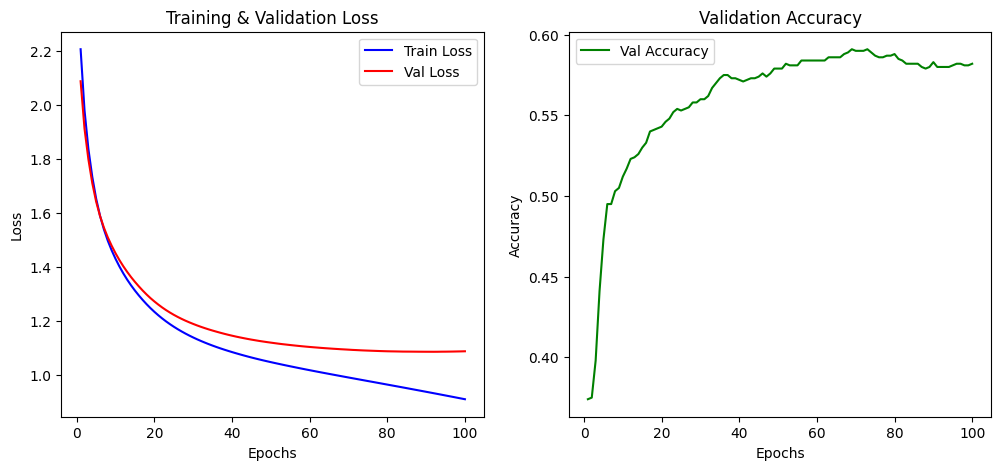

In [ ]:
plot_training_history(train_losses, val_losses, val_accuracies)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

In [ ]:
import torch
import torch.nn.functional as F

def predict(model, data_loader, device):

    model.eval()
    predicted_labels = []

    with torch.no_grad():
        for batch_idx, data in enumerate(data_loader):
            data = data[0]
            data = data.permute(0, 3, 1, 2)
            data = data.to(device)
            outputs = model(data)
            probabilities = F.softmax(outputs, dim=1)
            predictions = torch.argmax(probabilities, dim=1)

            predicted_labels.extend(predictions.cpu().numpy())

    return predicted_labels


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      0.46      0.48       113
           1       0.62      0.52      0.57       100
           2       0.65      0.51      0.57       250
           3       0.55      0.77      0.64       250
           4       0.47      0.52      0.50        50
           5       0.39      0.44      0.42        25
           6       0.00      0.00      0.00        12
           7       0.73      0.74      0.74       100
           8       1.00      0.20      0.33        25
           9       0.78      0.81      0.80        75

    accuracy                           0.60      1000
   macro avg       0.57      0.50      0.50      1000
weighted avg       0.61      0.60      0.59      1000



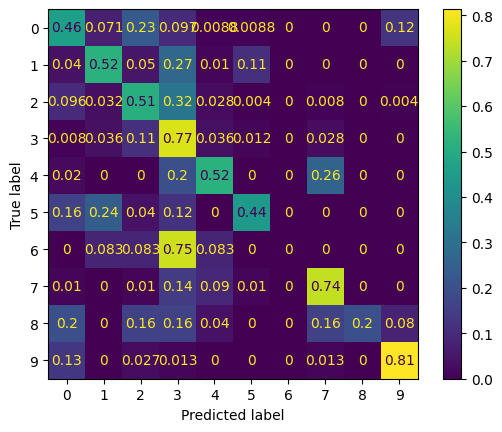

In [ ]:
prediction = predict(model, test_loader, device)
label = test_labels

cm = confusion_matrix(label, prediction, normalize='true')
cm = ConfusionMatrixDisplay(cm)
cm.plot()

print(classification_report(label, prediction))

In [ ]:
train_pred = predict(model, original_train_loader, device)
val_pred = predict(model, val_loader, device)
test_pred = predict(model, test_loader, device)

In [ ]:
def calculate_metrics(y_true, y_pred):
    labels = np.unique(y_true)
    metrics = []
    for label in labels:
        accuracy = accuracy_score(y_true == label, y_pred == label)
        precision = precision_score(y_true == label, y_pred == label, zero_division=0)
        recall = recall_score(y_true == label, y_pred == label, zero_division=0)
        f1 = f1_score(y_true == label, y_pred == label, zero_division=0)
        metrics.append([label, accuracy, precision, recall, f1])
    return metrics

train_metrics = calculate_metrics(train_labels, train_pred)
val_metrics = calculate_metrics(val_labels, val_pred)
test_metrics = calculate_metrics(test_labels, test_pred)

metrics_df = pd.DataFrame(train_metrics + val_metrics + test_metrics,
                          columns=['Label', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_df['Dataset'] = ['Train'] * len(train_metrics) + ['Val'] * len(val_metrics) + ['Test'] * len(test_metrics)


In [ ]:
for dataset in ['Train', 'Val', 'Test']:
    print(f"Metrics for {dataset} Dataset:\n")
    print(metrics_df[metrics_df['Dataset'] == dataset][['Label', 'Accuracy', 'Precision', 'Recall', 'F1-Score']])
    print("\n")

Metrics for Train Dataset:

   Label  Accuracy  Precision    Recall  F1-Score
0      0  0.914000   0.609959  0.653333  0.630901
1      1  0.944625   0.705409  0.766250  0.734572
2      2  0.857000   0.720391  0.699500  0.709792
3      3  0.841125   0.665607  0.732500  0.697453
4      4  0.963750   0.677419  0.525000  0.591549
5      5  0.981250   0.676056  0.480000  0.561404
6      6  0.987500   0.000000  0.000000  0.000000
7      7  0.950750   0.732265  0.800000  0.764636
8      8  0.986000   0.755814  0.650000  0.698925
9      9  0.968500   0.830798  0.728333  0.776199


Metrics for Val Dataset:

    Label  Accuracy  Precision    Recall  F1-Score
10      0     0.909   0.591304  0.607143  0.599119
11      1     0.938   0.711111  0.640000  0.673684
12      2     0.828   0.668103  0.620000  0.643154
13      3     0.804   0.582822  0.760000  0.659722
14      4     0.953   0.542857  0.380000  0.447059
15      5     0.973   0.461538  0.480000  0.470588
16      6     0.986   0.000000  0.000

In [ ]:
raster_data = get_neighbor_values_for_subset(df_unique)

In [ ]:
raster_data

array([[[[-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
          -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
         [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
          -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
         [ 2.33962500e-002,  2.40837500e-002,  4.66750000e-002, ...,
           3.31616250e-001,  1.83570000e-001,  7.98400000e-002]],

        [[-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
          -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
         [ 2.50050000e-002,  2.55550000e-002,  4.94937500e-002, ...,
           3.36112500e-001,  1.89427500e-001,  8.15175000e-002],
         [ 2.33275000e-002,  2.39187500e-002,  4.52587500e-002, ...,
           3.24012500e-001,  1.75100000e-001,  7.59350000e-002]],

        [[-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
          -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
         [ 2.20762500e-002,  2.29150000e-002,  4.61662500e

In [ ]:
import numpy as np

value_to_find = -1.7976931348623157e+308
indices = np.where(raster_data == value_to_find)

if indices[0].size > 0:
    print(f"Value {value_to_find} found at indices: {indices}")
else:
    print(f"Value {value_to_find} not found.")


Value -1.7976931348623157e+308 found at indices: (array([       0,        0,        0, ..., 18230593, 18230593, 18230593]), array([0, 0, 0, ..., 2, 2, 2]), array([0, 0, 0, ..., 2, 2, 2]), array([0, 1, 2, ..., 4, 5, 6]))


In [ ]:
raster_data = replace_invalid_values(raster_data)

In [ ]:
raster_data = (raster_data - np.min(raster_data)) / (np.max(raster_data) - np.min(raster_data))

In [ ]:
mean = np.mean(raster_data)
std = np.std(raster_data)

print("Mean:", mean)
print("Std:", std)

if std == 0 or np.isnan(std) or np.isinf(std):
    print("Cảnh báo: Std không hợp lệ!")


Mean: 0.08002218570925923
Std: 0.07045704792861196


In [ ]:
raster_data

array([[[[0.05405182, 0.05405182, 0.05405182, ..., 0.05405182,
          0.05405182, 0.05405182],
         [0.05405182, 0.05405182, 0.05405182, ..., 0.05405182,
          0.05405182, 0.05405182],
         [0.01754621, 0.01806197, 0.0350099 , ..., 0.24877249,
          0.13770837, 0.05989025]],

        [[0.05405182, 0.05405182, 0.05405182, ..., 0.05405182,
          0.05405182, 0.05405182],
         [0.01875309, 0.0191657 , 0.03712453, ..., 0.25214557,
          0.14210266, 0.0611487 ],
         [0.01749464, 0.01793819, 0.03394743, ..., 0.24306816,
          0.13135418, 0.05696072]],

        [[0.05405182, 0.05405182, 0.05405182, ..., 0.05405182,
          0.05405182, 0.05405182],
         [0.01655595, 0.01718518, 0.03462824, ..., 0.24389338,
          0.12217363, 0.05093662],
         [0.01614334, 0.01626712, 0.03198754, ..., 0.2307002 ,
          0.12253466, 0.05134923]]],


       [[[0.05405182, 0.05405182, 0.05405182, ..., 0.05405182,
          0.05405182, 0.05405182],
         [0.

In [ ]:
raster_data_tensor = torch.tensor(raster_data, dtype=torch.float32)

raster_data_dataset = TensorDataset(raster_data_tensor)
raster_data_loader = DataLoader(raster_data_dataset, batch_size=64, shuffle=False)

In [ ]:
predictions = model.predict(raster_data)

AttributeError: 'InceptionNet' object has no attribute 'predict'

In [ ]:
raster_prediction = predict(model, raster_data_loader, device)

In [ ]:
output_df = df[['x', 'y']].copy()

output_df['prediction'] = raster_prediction

print(output_df)

             x     y  prediction
0           39  7748           0
1           39  7749           0
2           39  7750           0
3           39  7751           0
4           40  7746           0
...        ...   ...         ...
18230589  4287  1747           0
18230590  4287  1748           0
18230591  4287  1749           0
18230592  4287  1750           0
18230593  4287  1751           0

[18230594 rows x 3 columns]


In [ ]:


from collections import Counter

prediction_counts = Counter(output_df['prediction'])
prediction_counts


Counter({0: 5919126,
         7: 5645180,
         9: 1972171,
         2: 2157667,
         8: 713761,
         1: 1611150,
         3: 189124,
         5: 22152,
         4: 235,
         6: 28})

In [ ]:
predicted_classes = np.argmax(raster_prediction, axis=1)
output_map = predicted_classes.reshape(rows, cols)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
ds_output = gdal.Open(img_path, gdal.GA_ReadOnly)
data_output = ds_output.ReadAsArray()
bands, rows, cols = data_output.shape
output_map = np.zeros(shape=(rows, cols), dtype=np.float32) + 255
for index, lines in df.iterrows():
  i, j = lines['x'], lines['y']
  output_map[int(i)][int(j)] = raster_prediction[index]

In [ ]:
outfname = 'tdbb.output.tif'
driver = gdal.GetDriverByName("GTiff")

dst_ds = driver.Create(outfname, cols, rows, 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(ds.GetGeoTransform())
dst_ds.SetProjection(ds.GetProjection())

band = dst_ds.GetRasterBand(1)
band.SetNoDataValue(255)
band.WriteArray(output_map)
dst_ds = None